In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
raw_data = pd.read_excel('../data/titanic.xls')
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [86]:
raw_data.dtypes #항목별 타입을 한꺼번에 보여준다.

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [87]:
raw_data.columns #컬럼명 불러오기

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [88]:
len(raw_data.columns) #컬럼의 개수

14

In [89]:
raw_data.info() #info = 디테일한 정보를 알 수 있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [90]:
raw_data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


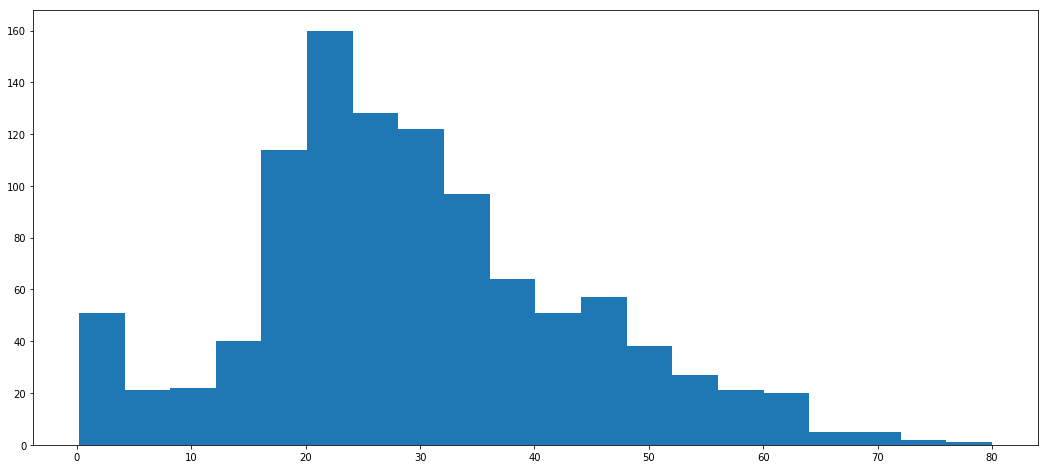

In [91]:
#히스토그램 (Histogram)은 도수분포표를 그래프로 나타낸 것으로서, 가로축은 계급, 세로축은 도수 (횟수나 개수 등)를 나타냄
raw_data['age'].hist(bins=20, figsize=(18,8), grid=False)
# bins = y축의 범위를 주기.
# grid = 격자무늬 넣을지 안넣을지

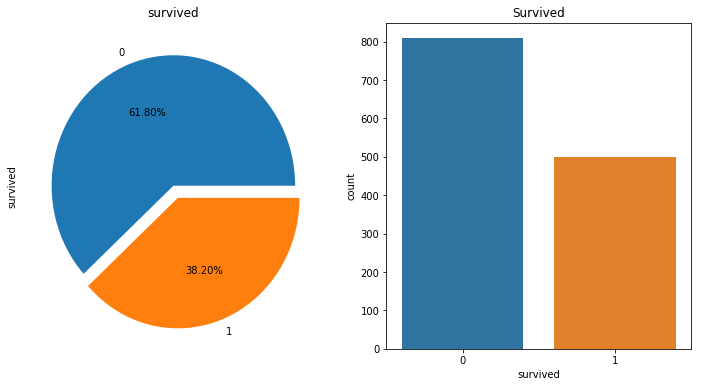

In [92]:
f, ax = plt.subplots(1, 2, figsize=(12,6))
raw_data['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('survived')
# survived 컬럼의 백터값들을 카운트 한 것들로 pie를 그림.

#countplot 명령은 데이터프레임에만 사용가능
#data 인수에는 대상이 되는 데이터프레임을, x 인수에는 데이터프레임의 열 이름 문자열을 넣는다.
sns.countplot('survived', data=raw_data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()                                   

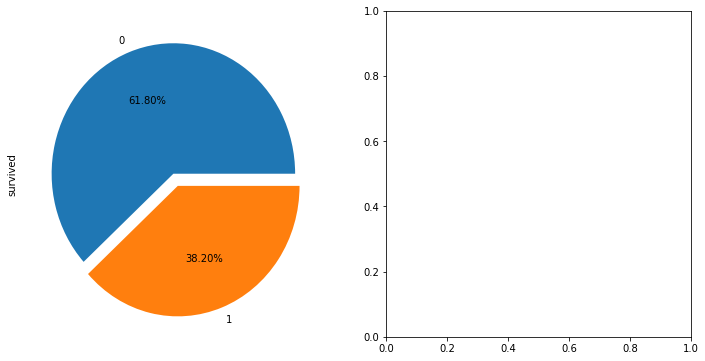

In [93]:
#여러개의 그래프를 그리고 싶을때, 서브플롯은 그래프가 그려질 위치를 격자형으로 지정하는데, plt.subplot(nrow,ncol,pos) 식으로 사용
f, ax = plt.subplots(1, 2, figsize=(12,6))
raw_data['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0])
#raw_data.groupby('pclass').mean()
# 1등급이 높다, 3등급이 낮다로 정의함.
# 인사이트: 등급이 높을수록 많이 살았다.
#           나이는 등급이 높을수록 많았다.
#           등급이 낮을 수록 동행한 가족/친족이 많았다.

In [94]:
raw_data.groupby('pclass').count() #등급별 인원을 세어봤음.
# 인사이트: 3등급의 인원이 제일 많았다.
#           1등급이 보트를 제일 많이 탔다.

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
pclass,,,,,,,,,,,,,
1,323,323,323,284,323,323,323,323,256,321,201,35,289
2,277,277,277,261,277,277,277,277,23,277,112,31,261
3,709,709,709,501,709,709,709,708,16,709,173,55,195


In [95]:
# 컬럼: 속성, 특성, 항목, 요소 => feature(피쳐)
# 피쳐가 많은 경우, 
# 1) 항목들을 제거, 
# 2)항목들이 크게 분석할 것과 상관이 없으면 제거
#   - 수학적 공분산 계산: 숫자가 커지면 공분산이 커짐.
#   - 상관도 계산: 숫자를 -1~1 사이로 범위로 정해서 상관관계를 계산
# 피쳐들을 선택, 전처리 등: 피쳐엔지니어링(속성 공하): 

In [96]:
raw_data.corr() #각 항목들의 상관도를 구해줌(-1 ~ 1)
#상관관계를 구했는데,
# 0:컬럼간에 전혀 상관이 없다.
# 1: 완벽히 상관이 있다 (양).
# -1: 완벽히 상관이 있다(음)
# + - 0.3: 약간 상관이 있다.
# + - 0.5: 상관이 있는 것 같다.
# + - 0.7: 꽤 큰 상관이 있다.

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [97]:
# 피쳐들간의 상관을 한눈에 알고 싶으면, 그래프를 써라!
# 상관도를 알 수 있는 그래프: heatmap, scatter
# 참고: fare: 요금 , parch: 함꼐 탑승한 부모나 자녀의 수, sibsp: 형제 자매나 배우자 수

In [98]:
#cut = 숫자(bins)를 기준으로 범위 나누기(labels)
#include_lowest = 최하값 포함. ex) 0<=x<3
raw_data['age_cat'] = pd.cut(raw_data['age'],
                             bins=[0, 3, 7, 15, 30, 60, 100],
                             include_lowest = True,
                             labels = ['baby', 'children', 'teenage', 
                                     'young', 'adult', 'old']
                            )
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [99]:
raw_data.groupby('age_cat').mean() #groupby = 한 컬럼을 기준으로 값이 같은 것들끼리 그룹화시켜줌.

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


In [100]:
raw_data.groupby('age_cat').count()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
age_cat,,,,,,,,,,,,,,
baby,41,41,41,41,41,41,41,41,41,7,41,26,1,25
children,25,25,25,25,25,25,25,25,25,5,25,16,0,14
teenage,49,49,49,49,49,49,49,49,49,5,49,21,3,29
young,494,494,494,494,494,494,494,494,494,82,494,178,43,289
adult,404,404,404,404,404,404,404,404,404,155,403,168,63,302
old,33,33,33,33,33,33,33,33,32,18,32,8,10,26


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


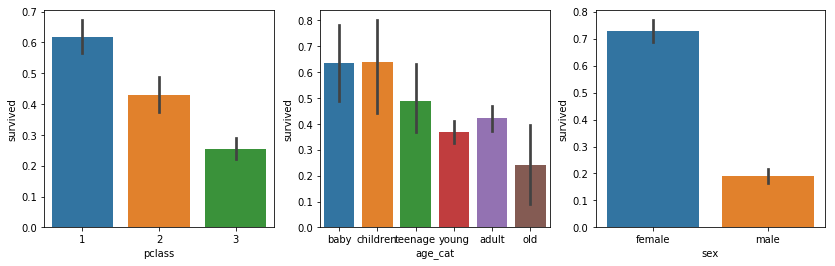

In [101]:
plt.figure(figsize=[14,4])
#1행에 3개를 넣고, 아래에 있는 1번째 그래프임
plt.subplot(131)
sns.barplot('pclass', 'survived', data=raw_data)
#age_cat, sex별로 그려보세요.
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)
plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)
plt.show()

In [102]:
boat_survivors = raw_data['boat']
boat_survivors

0         2
1        11
2       NaN
3       NaN
4       NaN
5         3
6        10
7       NaN
8         D
9       NaN
10      NaN
11        4
12        9
13        6
14        B
15      NaN
16      NaN
17        6
18        8
19        A
20        5
21        5
22        5
23        4
24        8
25      NaN
26        7
27        7
28        8
29        D
       ... 
1279    NaN
1280    NaN
1281    NaN
1282    NaN
1283    NaN
1284    NaN
1285    NaN
1286      C
1287    NaN
1288    NaN
1289    NaN
1290    NaN
1291    NaN
1292    NaN
1293    NaN
1294    NaN
1295    NaN
1296    NaN
1297    NaN
1298    NaN
1299      C
1300    NaN
1301    NaN
1302    NaN
1303    NaN
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: boat, Length: 1309, dtype: object

In [103]:
#raw_data['boat'].notnull => true/false
# raw_data[raw_data['boat'].notnull()] => []안에 쓴 조건의 결과 true인 것만 가지고 온다.
boat_survivors = raw_data[raw_data['boat'].notnull()]
boat_survivors

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0000,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",young
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0000,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",young
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0000,0,0,19877,78.8500,NaN,S,6,NaN,NaN,young
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0000,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",old
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0000,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ",adult


In [104]:
#보트 탄 사람들 중 생존자/ 비생존자를 파이차트와 카운트 플롯으로 그려보세요.
boat_survivors['boat'].notnull()

0       True
1       True
5       True
6       True
8       True
11      True
12      True
13      True
14      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
26      True
27      True
28      True
29      True
31      True
32      True
33      True
35      True
36      True
37      True
41      True
42      True
43      True
        ... 
1131    True
1149    True
1159    True
1162    True
1182    True
1187    True
1188    True
1189    True
1190    True
1196    True
1205    True
1216    True
1223    True
1228    True
1232    True
1233    True
1236    True
1238    True
1240    True
1244    True
1247    True
1254    True
1256    True
1257    True
1258    True
1260    True
1261    True
1277    True
1286    True
1299    True
Name: boat, Length: 486, dtype: bool

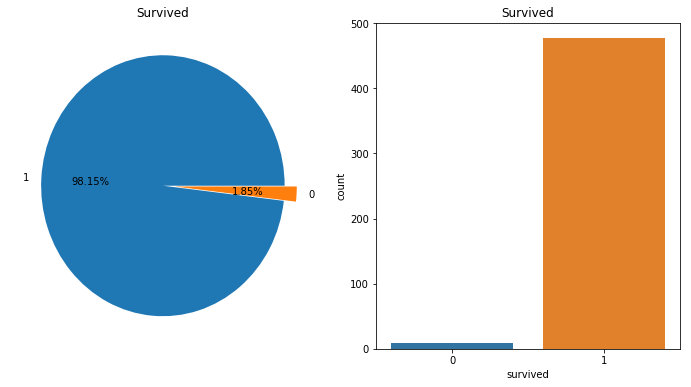

In [105]:
# 보트를 탄 사람들 중 생존자/비생존자를 파이차트와 카운트플롯으로 그려보세요.
f,ax=plt.subplots(1,2,figsize=(12, 6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=boat_survivors,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [106]:
raw_data.dtypes

pclass          int64
survived        int64
name           object
sex            object
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked       object
boat           object
body          float64
home.dest      object
age_cat      category
dtype: object

In [107]:
raw_data['name']

0                           Allen, Miss. Elisabeth Walton
1                          Allison, Master. Hudson Trevor
2                            Allison, Miss. Helen Loraine
3                    Allison, Mr. Hudson Joshua Creighton
4         Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
5                                     Anderson, Mr. Harry
6                       Andrews, Miss. Kornelia Theodosia
7                                  Andrews, Mr. Thomas Jr
8           Appleton, Mrs. Edward Dale (Charlotte Lamson)
9                                 Artagaveytia, Mr. Ramon
10                                 Astor, Col. John Jacob
11      Astor, Mrs. John Jacob (Madeleine Talmadge Force)
12                          Aubart, Mme. Leontine Pauline
13                           Barber, Miss. Ellen "Nellie"
14                   Barkworth, Mr. Algernon Henry Wilson
15                                    Baumann, Mr. John D
16                               Baxter, Mr. Quigg Edmond
17        Baxt

In [108]:
raw_data['name'][0]

'Allen, Miss. Elisabeth Walton'

In [109]:
raw_data['name'][0].split(',')

['Allen', ' Miss. Elisabeth Walton']

In [110]:
raw_data['name'][0].split(',')[1]

' Miss. Elisabeth Walton'

In [111]:
raw_data['name'][0].split(',')[1].split('.')

[' Miss', ' Elisabeth Walton']

In [112]:
raw_data['name'][0].split(',')[1].split('.')[0]

' Miss'

In [113]:
len(raw_data['name'][0].split(',')[1].split('.')[0].strip())

4

In [114]:
def call(x):
    print(x + 100)

In [115]:
call(100) #한줄씩 번역해서 실행

200


In [116]:
#프로그램 언어 분류: 번역해서 실행방식을 기준
#한줄씩 번역해서 실행 (번역기, interpreter, 인터프리터): 인터프리터 언어, 파이썬, R
#통째로 번역해서 실행(COMPLIER, 컴파일러): 속도가 빠르다, 컴파일 언어, 자바, C++

In [117]:
# 잠깐만 사용할때는 람다 이용
test = lambda x: x + 2 # x는 입력값, x + 2: 입력값 x에 들어 있는 값에 2를 더하라.
test(2)

4

In [118]:
map(test, range(5)) #map(처리함수, 브로드캐스팅할 데이터 리스트)
#range(5): [0,1,2,3,4]

In [119]:
# map(f, iterable)은 함수(f)와 반복 가능한(iterable) 자료형을 입력으로 받는다. 
# map은 입력받은 자료형의 각 요소를 함수 f가 수행한 결과를 묶어서 돌려주는 함수이다.
list(map(test, range(5)))

[2, 3, 4, 5, 6]

In [120]:

conversion_rare = lambda x: x.split(',')[1].split('.')[0].strip()
# for문을사용하여 name 리스트를 conversion_rare 함수처리 함
#list(map(conversion_rare, raw_data['name']))

#람다함수를 사용해 파생변수로 넣는 두가지 방법

# 1
# map(람다함수, 사용할 데이터)의 결과값 = map형태
# map을 list로 변환하여 파생변수로 넣을 수 있음.
#2
# raw_data['name'].map(conversion_rare) 의 반환값은 object
raw_data['title'] = raw_data['name'].map(conversion_rare)
#type은 series
raw_data['title']

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
5           Mr
6         Miss
7           Mr
8          Mrs
9           Mr
10         Col
11         Mrs
12         Mme
13        Miss
14          Mr
15          Mr
16          Mr
17         Mrs
18        Miss
19          Mr
20          Mr
21         Mrs
22          Mr
23        Miss
24        Miss
25          Mr
26          Mr
27         Mrs
28        Miss
29          Mr
         ...  
1279      Miss
1280        Mr
1281        Mr
1282        Mr
1283        Mr
1284        Mr
1285        Mr
1286       Mrs
1287        Mr
1288        Mr
1289        Mr
1290       Mrs
1291        Mr
1292        Mr
1293        Mr
1294        Mr
1295        Mr
1296        Mr
1297        Mr
1298        Mr
1299        Mr
1300       Mrs
1301        Mr
1302        Mr
1303        Mr
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: title, Length: 1309, dtype: object

In [121]:
type(raw_data['name'])


pandas.core.series.Series

In [122]:
# list가 df의 컬럼이 되는 순간 Series로 변환됨.

In [123]:
list1 = list(map(conversion_rare, raw_data['name']))
len(list1)

1309

In [124]:
type(list1)

list

In [125]:
raw_data['title'] = list1

In [126]:
raw_data['title']

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
5           Mr
6         Miss
7           Mr
8          Mrs
9           Mr
10         Col
11         Mrs
12         Mme
13        Miss
14          Mr
15          Mr
16          Mr
17         Mrs
18        Miss
19          Mr
20          Mr
21         Mrs
22          Mr
23        Miss
24        Miss
25          Mr
26          Mr
27         Mrs
28        Miss
29          Mr
         ...  
1279      Miss
1280        Mr
1281        Mr
1282        Mr
1283        Mr
1284        Mr
1285        Mr
1286       Mrs
1287        Mr
1288        Mr
1289        Mr
1290       Mrs
1291        Mr
1292        Mr
1293        Mr
1294        Mr
1295        Mr
1296        Mr
1297        Mr
1298        Mr
1299        Mr
1300       Mrs
1301        Mr
1302        Mr
1303        Mr
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: title, Length: 1309, dtype: object

In [127]:
type(raw_data['title'])

pandas.core.series.Series

In [128]:
#name에 대해 중복 제거
titles = raw_data['title'].unique()
titles


array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [129]:
# crosstab : 교차표를 이용해 데이터 재구조화
# raw_data['title'] : index
# raw_data['sex']: columns
pd.crosstab(raw_data['title'], raw_data['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [130]:
# name을 치환
raw_data['title'] = raw_data['title'].replace('Mlle','Miss')
raw_data['title'] = raw_data['title'].replace('Ms','Miss')
raw_data['title'] = raw_data['title'].replace('Mme','Mrs')
raw_data['title']

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
5           Mr
6         Miss
7           Mr
8          Mrs
9           Mr
10         Col
11         Mrs
12         Mrs
13        Miss
14          Mr
15          Mr
16          Mr
17         Mrs
18        Miss
19          Mr
20          Mr
21         Mrs
22          Mr
23        Miss
24        Miss
25          Mr
26          Mr
27         Mrs
28        Miss
29          Mr
         ...  
1279      Miss
1280        Mr
1281        Mr
1282        Mr
1283        Mr
1284        Mr
1285        Mr
1286       Mrs
1287        Mr
1288        Mr
1289        Mr
1290       Mrs
1291        Mr
1292        Mr
1293        Mr
1294        Mr
1295        Mr
1296        Mr
1297        Mr
1298        Mr
1299        Mr
1300       Mrs
1301        Mr
1302        Mr
1303        Mr
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: title, Length: 1309, dtype: object

In [131]:
#드물게 발생하는 값에 대해 하나로 통합해 처리하자
Rare = ['Lady','the Countess','Countess','Capt', 'Master',
        'Col','Don','Dr','Major','Rev','Sir','Jonkheer', 'Dona']

#for문을 이용해 Rare에 있는 항목을 각각 'Rare'로 치환
for each in Rare:
    raw_data['title'] = raw_data['title'].replace(each, 'Rare')
    
raw_data['title'].unique()

array(['Miss', 'Rare', 'Mr', 'Mrs'], dtype=object)

In [132]:
# raw_data.groupby('title').mean() :모든 컬럼 다 보임
raw_data[['title', 'survived']].groupby(['title'], as_index=False).mean() #title, survived만 보임

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare,0.466667


In [133]:
#title을 index로 columns의 평균을 구함
raw_data.groupby('title').mean() 

,pclass,survived,age,sibsp,parch,fare,body
title,,,,,,,
Miss,2.337121,0.678030,21.824335,0.655303,0.496212,42.566747,229.333333
Mr,2.381770,0.162483,32.252151,0.282695,0.159841,24.796185,162.792453
Mrs,1.934343,0.787879,36.918129,0.656566,0.828283,50.655366,129.000000
Rare,2.233333,0.466667,19.204732,1.511111,0.977778,39.302082,124.142857


In [134]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [135]:
tmp = ['f'] * 1309
#raw data의 'sex' 항목을 f로 치환
raw_data2 = raw_data.copy()#깊은복사. 주소만 복사되는 것이 아니라 모두 복사.
raw_data2['sex'] = tmp
raw_data2['sex']

0       f
1       f
2       f
3       f
4       f
5       f
6       f
7       f
8       f
9       f
10      f
11      f
12      f
13      f
14      f
15      f
16      f
17      f
18      f
19      f
20      f
21      f
22      f
23      f
24      f
25      f
26      f
27      f
28      f
29      f
       ..
1279    f
1280    f
1281    f
1282    f
1283    f
1284    f
1285    f
1286    f
1287    f
1288    f
1289    f
1290    f
1291    f
1292    f
1293    f
1294    f
1295    f
1296    f
1297    f
1298    f
1299    f
1300    f
1301    f
1302    f
1303    f
1304    f
1305    f
1306    f
1307    f
1308    f
Name: sex, Length: 1309, dtype: object

In [136]:
# tmp2 배열 생성
tmp2 = []
# 'sex' 컬럼에서 성별에 따라 0과 1로 치환
for x in raw_data['sex']:
    if x == 'female':
        tmp2.append(0)
    elif x == 'male':
        tmp2.append(1)
    else:
        tmp2.append(np.nan)  

In [137]:
len(tmp2)

1309

In [138]:
raw_data['sex'] = tmp2
raw_data['sex'].head()

0    0
1    1
2    0
3    1
4    0
Name: sex, dtype: int64

In [139]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [140]:
#타입 변환 to_frame(), astype('float')
#정수를 실수로
raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [141]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null int64
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
age_cat      1046 non-null category
title        1309 non-null object
dtypes: category(1), float64(7), int64(1), object(7)
memory usage: 155.0+ KB


In [142]:
# 각각의 항목이 notnull인 항목만 추출
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]
#raw_data.info()
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs
5,1.0,1.0,"Anderson, Mr. Harry",1,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult,Mr
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",0,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old,Miss
7,1.0,0.0,"Andrews, Mr. Thomas Jr",1,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",adult,Mr
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",0,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult,Mrs
9,1.0,0.0,"Artagaveytia, Mr. Ramon",1,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",old,Mr


In [143]:
# 'pclass','sex','age','sibsp','parch','fare'의 항목을 갖는 새로운 데이터 프레임 생성
train_pre = raw_data[['pclass','sex','age','sibsp','parch','fare']]
train_pre

,pclass,sex,age,sibsp,parch,fare
0,1.0,0,29.0000,0.0,0.0,211.3375
1,1.0,1,0.9167,1.0,2.0,151.5500
2,1.0,0,2.0000,1.0,2.0,151.5500
3,1.0,1,30.0000,1.0,2.0,151.5500
4,1.0,0,25.0000,1.0,2.0,151.5500
5,1.0,1,48.0000,0.0,0.0,26.5500
6,1.0,0,63.0000,1.0,0.0,77.9583
7,1.0,1,39.0000,0.0,0.0,0.0000
8,1.0,0,53.0000,2.0,0.0,51.4792
9,1.0,1,71.0000,0.0,0.0,49.5042


In [144]:
####### data 준비 끝 ##########

In [145]:
# 공부할 데이터/ 검즘용 데이터 분리

In [146]:
# 머신러닝용 라이브러리: sklearn, 사이킷헌
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(train_pre, #데이터 프레임
                raw_data[['survived']], #맞추어야 할 정답
                test_size = 0.1, #테스트데이터 10%지정, 훈련데이터 90%할당
                random_state = 13 #seed값
                )

In [148]:
len(X_train) #훈련용 데이터 문제

940

In [149]:
len(y_train) #훈련용 데이터의 해답

940

In [150]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
710,3.0,0,37.0,0.0,0.0,7.7500
423,2.0,1,34.0,0.0,0.0,13.0000
646,3.0,0,38.0,1.0,5.0,31.3875
596,2.0,1,31.0,0.0,0.0,13.0000
286,1.0,0,63.0,1.0,0.0,221.7792


In [151]:
y_train.head()

,survived
710,0.0
423,0.0
646,1.0
596,1.0
286,0.0


In [152]:
# 새로운 index 생성
 #인덱스를 0부터 다시 정렬 (랜덤값으로 섞였기 때문에)
X_train = X_train.reset_index()
X_train

,index,pclass,sex,age,sibsp,parch,fare
0,710,3.0,0,37.0000,0.0,0.0,7.7500
1,423,2.0,1,34.0000,0.0,0.0,13.0000
2,646,3.0,0,38.0000,1.0,5.0,31.3875
3,596,2.0,1,31.0000,0.0,0.0,13.0000
4,286,1.0,0,63.0000,1.0,0.0,221.7792
5,1252,3.0,1,44.0000,0.0,0.0,8.0500
6,600,3.0,1,42.0000,0.0,0.0,7.5500
7,583,2.0,0,40.0000,0.0,0.0,15.7500
8,853,3.0,1,25.0000,0.0,0.0,7.2500
9,692,3.0,0,18.5000,0.0,0.0,7.2833


In [153]:
# index 컬럼 삭제
X_train = X_train.drop(['index'], axis=1)
# 인덱스 열을 삭제. axis = 열단위로 작업
# inplace = true를 써도 됨! axis=1 말고
X_train

,pclass,sex,age,sibsp,parch,fare
0,3.0,0,37.0000,0.0,0.0,7.7500
1,2.0,1,34.0000,0.0,0.0,13.0000
2,3.0,0,38.0000,1.0,5.0,31.3875
3,2.0,1,31.0000,0.0,0.0,13.0000
4,1.0,0,63.0000,1.0,0.0,221.7792
5,3.0,1,44.0000,0.0,0.0,8.0500
6,3.0,1,42.0000,0.0,0.0,7.5500
7,2.0,0,40.0000,0.0,0.0,15.7500
8,3.0,1,25.0000,0.0,0.0,7.2500
9,3.0,0,18.5000,0.0,0.0,7.2833


In [154]:
X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

In [155]:
from sklearn.tree import DecisionTreeClassifier

#학습기 객체 생성
#파라메터를 분석가 임의로 변경할 수 있음.
#파라메터를 분석가가 변경가능, 변경 불가능
# 분석가가 변경가능한 파라메터를 '하이퍼파라메터'
#max_depth: 분기하는 가지의 개수
#random_state :랜덤으로 뽑아내는 난수  
tree_clf = DecisionTreeClassifier(max_depth = 5, random_state = 19)
#공부시키기
tree_clf.fit(X_train, y_train)
# train데이터를 가지고 공부한 점수
tree_clf.score(X_train, y_train)

0.8319148936170213

In [156]:
from sklearn.metrics import accuracy_score #채점해주는 라이브러리

y_pred = tree_clf.predict(X_test) #문제를 주고 풀어보라고 함.=> 정답 return!

#테스트데이터를 푼 답안과 해답을 비교해서 정확도를 구해보자.

accuracy_score(y_test, y_pred)

0.8285714285714286

In [157]:
# float 형태로 주어야 함
# 'pclass','sex','age','sibsp','parch','fare'
dicaprio = [3., 1., 19., 0., 0., 5.]
winslet = [1., 0., 17., 1., 1., 100.]

In [158]:
tree_clf.predict_proba([winslet]) #죽을 가능성[0], 살 가능성[1]

array([[0.00840336, 0.99159664]])

In [159]:
tree_clf.predict_proba([dicaprio])

array([[0.73611111, 0.26388889]])

In [160]:
me = [2.,0.,100.,0.,2.,10.]

In [161]:
tree_clf.predict_proba([me])

array([[0.5, 0.5]])